# Case Study 3.1: Challenger Launch

In this classic challenge we try to assess whether the data available prior to Challenger going up in flames was sufficient to show that performing the launch at 30 degrees was a terrible idea.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.data import Marginal

In [114]:
data = pd.read_csv('data/challenger-data.csv').drop('Observation', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X=data[['X']])
y = data['Y']
# We'll start by visualizing the margainl distribution between X and Y
marginals = Marginal()
show(marginals.explain_data(X=data[['X']], y=data['Y']))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



### Modeling Strategy

We end up using simple Logistic Regression and the ridge varient in fitting this data.  After plotting both, it is obvious that launch at 30 degrees is a terrible idea. A property of scikit-learn is that we can only get probabilistic predictions from the LogsisticRegression and not the RidgeClassifier class, but using that I can tell you that it was a rougly 80% chance that Challenger explode when launching in these conditions. 

In [104]:
ridge = RidgeClassifier(alpha=0.1, normalize=True)
cross_validate(estimator=ridge, X=X, y=y, n_jobs=12, return_train_score=True)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



{'fit_time': array([0.00200129, 0.00299978, 0.00200009]),
 'score_time': array([0.        , 0.        , 0.00100136]),
 'test_score': array([0.90243902, 0.925     , 0.92307692]),
 'train_score': array([0.92405063, 0.9125    , 0.91358025])}

In [105]:
ridge.fit(X=X, y=y)
ridge.coef_, ridge.intercept_

(array([[-0.15642059]]), array([-0.83333333]))

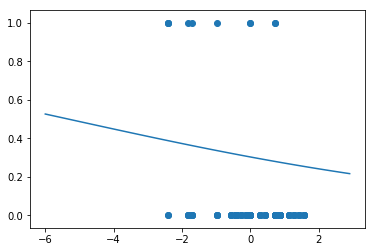

In [147]:
def sigmoid(x, model):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_*x)))

rng = np.arange(-6, 3, .1)
pred = sigmoid(rng, ridge).reshape(-1)
plt.scatter(X, y)
plt.plot(rng, pred)

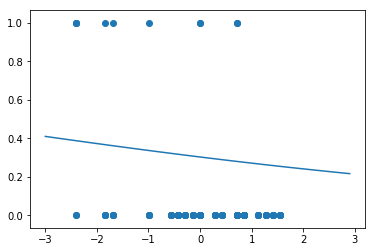

In [107]:
plt.scatter(X, y)
plt.plot(rng, pred)

In [136]:
linear = LogisticRegression()
linear.fit(X, y)
def predict_risk(temp):
    on_the_day = scaler.transform(X=[[temp]])
    return linear.predict_proba(on_the_day)[:, 1]

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [138]:
predict_risk(30)

array([0.88613666])

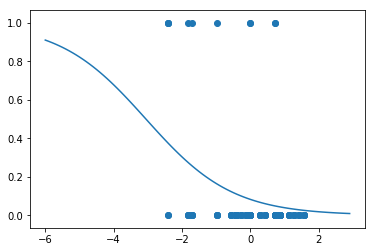

In [148]:
rng = np.arange(-6, 3, .1)
pred = sigmoid(rng, linear).reshape(-1)
plt.scatter(X, y)
plt.plot(rng, pred)